In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
plt.rc('font', family='Malgun Gothic')  # 윈도우: Malgun Gothic, 맥: AppleGothic 사용
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [55]:
# 네이버 쇼핑 인사이트 API 
df = pd.read_csv("converted_trend_data.csv")
# 유심히 봐야할 컬럼: period, ratio, device

In [21]:
# 데이터 샘플
df.head()

,startdate,enddate,timeunit,category,categoryparam,period,ratio,device,gender,ages
0,2024-01-01,2024-10-20,date,테마의류,50000819,2024-01-01,3.63636,pc,f,10
1,2024-01-01,2024-10-20,date,테마의류,50000819,2024-01-02,1.81818,pc,f,10
2,2024-01-01,2024-10-20,date,테마의류,50000819,2024-01-05,1.81818,pc,f,10
3,2024-01-01,2024-10-20,date,테마의류,50000819,2024-01-06,5.45454,pc,f,10
4,2024-01-01,2024-10-20,date,테마의류,50000819,2024-01-07,34.54545,pc,f,10


In [22]:
# 성별 비율 계산
gender_counts = df['gender'].value_counts(normalize=True) * 100
gender_counts_dict = gender_counts.to_dict()
print("남성 비율: ", gender_counts_dict.get('m', 0), "%")
print("여성 비율: ", gender_counts_dict.get('f', 0), "%")

남성 비율:  49.198874192895644 %
여성 비율:  50.801125807104356 %


In [23]:
# 연령대 비율 계산
age_counts = df['ages'].value_counts(normalize=True) * 100
age_counts_dict = age_counts.to_dict()
print("연령대 비율:", age_counts_dict)

연령대 비율: {30: 17.297327127904197, 40: 17.297327127904197, 50: 17.232942734681114, 60: 17.183274774194736, 20: 17.060024650024832, 10: 13.929103585290925}


In [45]:
# 기기 비율 계산
device_counts = df['device'].value_counts(normalize=True) * 100
device_counts_dict = device_counts.to_dict()
print("PC 비율:", device_counts_dict.get('pc', 0), "%")
print("MO 비율:", device_counts_dict.get('mo', 0), "%")

PC 비율: 48.440977906955354 %
MO 비율: 51.559022093044646 %


In [25]:
# 카테고리 비율 계산
category_counts = df['category'].value_counts(normalize=True) * 100
category_counts_dict = category_counts.to_dict()
print("카테고리 비율:", category_counts_dict)

카테고리 비율: {'상의': 12.974375011497214, '원피스': 12.904471955997865, '운동복': 12.87135998234028, '아우터': 12.748109858170379, '하의': 12.630378396276743, '테마의류': 12.564154448961574, '수트/셋업': 11.763948418903258, '임산부의류': 11.543201927852689}


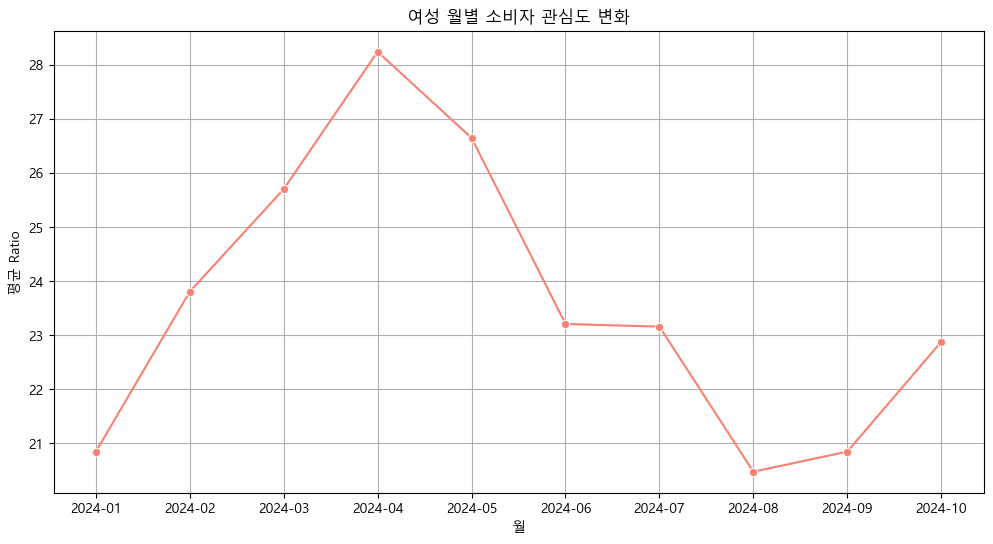

In [61]:
# 여성 월별 소비자 관심도 변화
# 여성 데이터만 필터링 후 복사본 생성
df_female = df[df['gender'] == 'f'].copy()

# period 컬럼을 datetime 형식으로 변환
df_female['period'] = pd.to_datetime(df_female['period'], errors='coerce')  # 오류 발생 시 NaT로 처리

# period 컬럼에서 월만 추출하여 month 컬럼 생성
df_female['month'] = df_female['period'].dt.strftime('%Y-%m')  # 'YYYY-MM' 형식으로 월 추출

# 월별 평균 Ratio 계산
monthly_ratio_female = df_female.groupby('month')['ratio'].mean().reset_index()

# 월별 여성 소비자 관심도 변화 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_ratio_female, x='month', y='ratio', marker='o', color='salmon')
plt.title('여성 월별 소비자 관심도 변화')
plt.xlabel('월')
plt.ylabel('평균 Ratio')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


# 2024 월별 여성 소비자 관심도에 따른 마케팅 전략

1. 봄철 마케팅 캠페인 (1월 - 4월)

- 봄맞이 프로모션: 관심도가 높은 3월~4월에 맞춰 봄 신상품 출시와 함께 할인 행사를 진행하여 구매 전환율을 높이기.

- SNS 및 인플루언서 마케팅 강화: 봄철 유행 아이템을 강조하며, 인스타그램, 틱톡 등에서 봄 패션 룩북을 공유하고 인플루언서와 협력해 브랜드 인지도를 높이기.

- 맞춤형 광고: 관심도가 급상승하는 2월~3월에 고객의 성향에 맞는 추천 아이템을 제공하여 개별화된 광고를 진행.



2. 여름철 전략적 광고 축소 및 휴가 패션 프로모션 (5월 - 8월)

- 집중 마케팅 축소: 관심도가 낮아지는 5월부터는 예산을 효율적으로 사용하기 위해 전략적 광고 집중도를 낮추는 것도 고려.

- 휴가철 테마 캠페인: 여름철 관심이 감소하는 시기를 겨냥해, 
  여행지에서 활용할 수 있는 패션 아이템(예: 수영복, 가벼운 아우터, 액세서리 등)을 중심으로 휴가 테마 캠페인을 진행하여 관심을 유도.
  


3. 가을 패션 집중 마케팅 (9월 - 10월)
   
- 가을 시즌 아이템 집중 프로모션: 9월부터 관심도가 다시 증가하므로, 이 시기에 가을 신상품을 론칭하고 관련 할인 행사 및 쿠폰을 제공.

- SEO 및 검색 광고 강화: 소비자들이 패션을 적극적으로 검색하는 시기이므로, 가을/겨울 패션 키워드를 활용한 검색 광고와 SEO 최적화를 통해 제품 노출을 극대화.

- 리타겟팅 광고: 이전에 봄/여름 시즌 상품을 구매한 고객을 대상으로 가을 패션 상품에 대한 리타겟팅 광고를 진행하여 고객의 재방문을 유도.

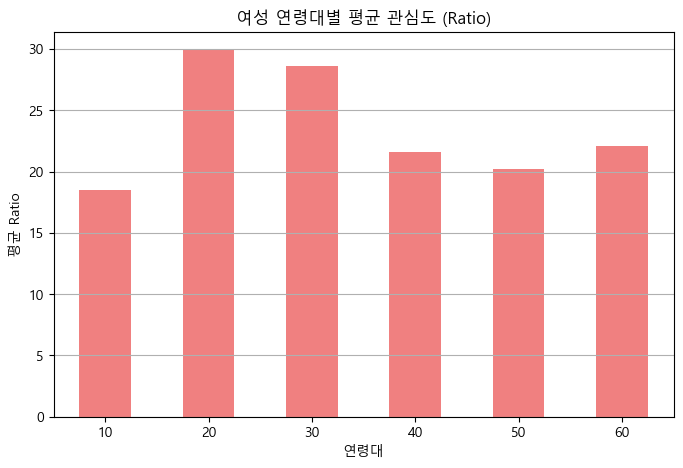

In [43]:
# 여성 데이터만 필터링하여 연령대별 평균 관심도 계산 및 시각화
gender_age_ratio_female = df[df['gender'] == 'f'].groupby('ages')['ratio'].mean()

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
gender_age_ratio_female.plot(kind='bar', color='lightcoral')
plt.title('여성 연령대별 평균 관심도 (Ratio)')
plt.xlabel('연령대')
plt.ylabel('평균 Ratio')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


# 2024 여성 연령대별 관심도에 따른 마케팅 전략

1. 20대와 30대 여성 집중:

- 20대와 30대 여성의 평균 관심도가 가장 높음. 
- 이 연령대를 대상으로 한 마케팅이 가장 효과적일 것으로 보이며, 최신 트렌드를 반영한 패션 아이템과 관련된 광고를 강화.
- 추천 전략: 인스타그램, 틱톡 같은 소셜 미디어를 활용한 광고와 인플루언서 마케팅. 스타일 추천이나 룩북 제공도 효과적.

2. 10대 여성 타겟팅:

- 10대 여성의 관심도도 다른 연령대에 비해 높음.
- 이들은 빠르게 변화하는 트렌드에 민감하므로, 유행 아이템과 관련된 콘텐츠를 자주 업데이트하는 것이 중요.
- 추천 전략: 가격이 저렴한 제품이나 학생층이 선호하는 스타일을 강조하고, 짧은 시간 내에 구매를 유도하는 플래시 세일을 활용.

3. 40대 이상 연령층:

- 40대 이상 여성은 상대적으로 관심도가 낮지만, 품질과 실용성을 중시하는 경향이 있을 수 있음.
- 추천 전략: 품질을 강조하는 메시지와 함께, 기능성 의류와 편안한 착용감을 강조하는 광고가 효과적일 수 있음.

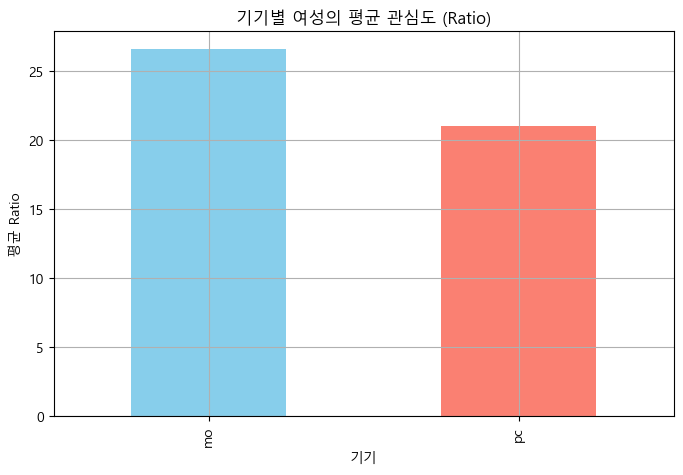

In [60]:
# 2024 기기별 여성의 관심도 차이 분석
device_ratio = df.groupby('device')['ratio'].mean()
device_ratio.plot(kind='bar', color=['skyblue', 'salmon'], figsize=(8, 5))
plt.title('기기별 여성의 평균 관심도 (Ratio)')
plt.xlabel('기기')
plt.ylabel('평균 Ratio')
plt.grid(True)
plt.show()

# 2024 기기별 관심도 차이에 의한 마케팅 전략

이 그래프에서 모바일(mo) 사용자가 **PC 사용자보다 평균 관심도(Ratio)**가 더 높은 것을 확인.
모바일 기기가 패션 아이템 탐색에 더 많이 사용되고 있음을 의미.

1. 모바일 최적화 광고:

- 모바일 사용자 비율이 높으므로, 인스타그램, 틱톡 등 모바일 친화적인 소셜 미디어 플랫폼에 집중적인 광고를 배치. 
- 모바일 앱에서 자주 노출되는 스토리 광고나 피드 광고를 통해 자연스럽게 소비자의 관심을 끌 것.

2. 모바일 전용 할인 및 알림:

- 모바일 사용자를 대상으로 모바일 앱 전용 할인 쿠폰을 제공하거나, 새로운 상품이나 할인 정보를 푸시 알림을 통해 실시간으로 전달하여 구매를 유도.

3. 모바일 결제 간소화:

- 모바일에서 구매를 더 쉽게 할 수 있도록 간편 결제 시스템을 최적화. 
예를 들어, 클릭 한 번으로 결제할 수 있는 기능을 강화해 소비자의 구매 전환율을 높이기.

4. 리타겟팅 광고:

- 모바일에서 관심을 보였던 상품을 기준으로 리타겟팅 광고를 진행하여, 웹 브라우징 중이거나 앱을 다시 열었을 때 같은 제품을 보여줌으로써 재방문을 유도.

2024 카테고리별 기기별 평균 관심도 (Ratio):
category         상의     수트/셋업        아우터        운동복        원피스      임산부의류  \
device                                                                      
mo        36.027968  3.567895  43.874140  27.223451  34.379554  23.422039   
pc        24.629577  3.695336  35.574186  20.632965  27.852505  16.050653   

category       테마의류         하의  
device                          
mo        33.274741  10.307354  
pc        27.917727   8.296042  


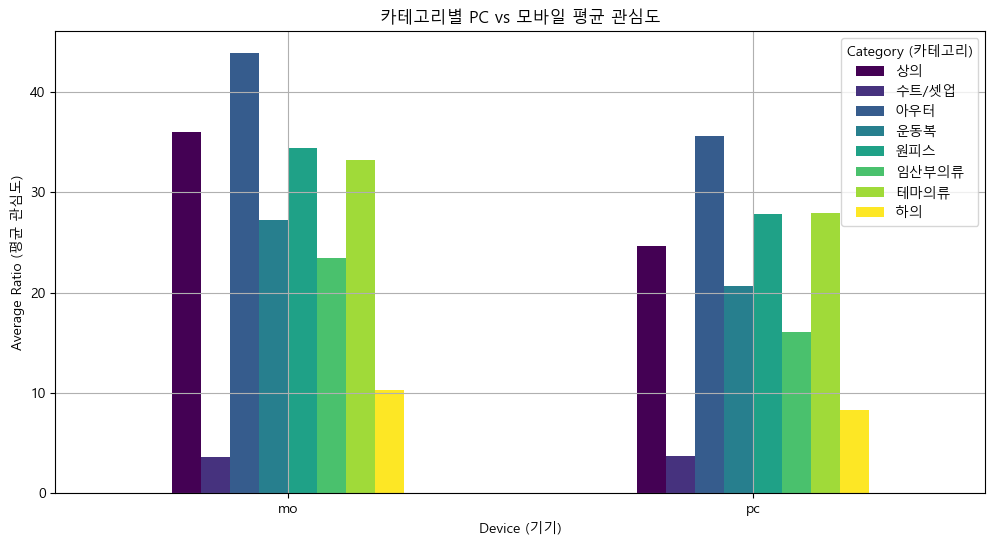

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 카테고리별, 기기별 평균 관심도 계산
device_category_ratio = df.groupby(['device', 'category'])['ratio'].mean().unstack()

# 결과 확인
print("2024 카테고리별 기기별 평균 관심도 (Ratio):")
print(device_category_ratio)

# 시각화
device_category_ratio.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('카테고리별 PC vs 모바일 평균 관심도')
plt.xlabel('Device (기기)')
plt.ylabel('Average Ratio (평균 관심도)')
plt.legend(title='Category (카테고리)')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

# 2024 카테고리별 기기별 관심도에 따른 마케팅 전략

1. 모바일(mo) 중심 전략

모바일에서 높은 관심도를 보이는 카테고리는 수트/셋업, 아우터, 운동복, 원피스, 테마의류. 
이러한 카테고리는 즉각적인 반응을 유도하는 모바일 광고와 프로모션이 효과적.

- 수트/셋업 및 아우터:

소셜 미디어 및 인플루언서 마케팅: 인스타그램, 틱톡과 같은 시각적 SNS 플랫폼에서 패션 인플루언서를 활용해 홍보.
모바일 전용 플래시 세일: 1~2일 단위로 진행하는 단기 세일을 통해 모바일 사용자가 즉시 반응.

- 운동복 및 원피스:

알림 및 푸시 메시지 활용: 장바구니에 담은 사용자에게 할인 알림을 보내 즉각 구매를 유도.
맞춤형 추천 광고: 운동복이나 원피스 구매 이력이 있는 사용자에게 유사 상품을 추천하는 광고를 제공.

- 테마의류:

시즌별 테마 프로모션: 시즌이나 이벤트와 관련된 테마 상품을 적극적으로 홍보하고, 여름/겨울과 같은 시즌을 겨냥한 제품을 추천.
모바일에서 빠르게 확인 가능한 룩북 제공: 여러 테마 상품을 한눈에 볼 수 있는 룩북을 모바일에 최적화해 제공해 빠르게 관심을 끌 것.

2. PC 중심 전략

PC에서 관심도가 높은 카테고리에는 상의, 임산부의류, 하의가 포함. 

이들은 긴 시간 검토가 필요한 상품으로, PC 환경에 적합한 자세한 정보와 비교 기능을 강조한 마케팅이 효과적일 것.

- 상의 및 하의:
고화질 이미지와 상세 설명 제공: 제품의 디테일을 강조할 수 있도록 고화질 이미지와 상세한 사이즈 및 재질 정보를 PC 웹사이트에서 제공하여 구매 확신을 줄 것.
상품 비교 기능: 비슷한 상의와 하의 제품을 비교할 수 있는 기능을 제공해 소비자가 심층적으로 검토하고 선택할 수 있도록 지원.
    
- 임산부의류:
안정성 및 기능성 강조 콘텐츠: 임산부가 중요한 관심을 두는 소재와 편안함에 대한 설명을 충분히 제공하고, 사용자 리뷰와 평점을 통해 신뢰도를 높이기.
리타겟팅 광고: 임산부 관련 상품을 장바구니에 담거나 조회한 사용자에게 PC와 모바일에서 리타겟팅 광고를 제공해 구매로 이어지도록 유도.

3. 혼합 전략 (모바일과 PC 모두 활용)

운동복, 테마의류와 같이 모바일과 PC에서 모두 높은 관심을 보이는 카테고리는 양쪽 플랫폼을 혼합하여 접근하는 것이 효과적.

- 운동복:

모바일에서의 편리한 주문과 PC에서의 정보 제공을 혼합하여 사용자 경험을 강화.
모바일 광고로 관심을 끌고, PC에서 재구매 유도: 첫 구매 이후 재구매 시 PC에서 정보를 추가 제공하여 더욱 충성도 높은 고객층을 확보.

- 테마의류:

이벤트 캠페인 특정 시즌(예: 여름, 겨울)에 맞춘 테마 상품을 PC와 모바일 모두에서 적극적으로 광고하여 소비자 관심을 유도. -->
소셜 미디어와 웹사이트 룩북 연동: 모바일에서 룩북을 보여준 후, PC에서 추가 정보를 제공하는 방식으로 통합된 경험을 제공.

------------------------------
요약

모바일: 빠른 소비를 유도하는 카테고리에는 즉각적인 알림, 소셜 미디어 마케팅, 플래시 세일을 활용.

PC: 세부 정보를 많이 요구하는 카테고리에는 고화질 이미지, 상품 비교 기능, 신뢰성 높은 리뷰 콘텐츠를 제공.

혼합: 운동복과 테마의류처럼 양쪽 기기에서 관심이 있는 상품은 플랫폼별 장점을 활용한 통합 마케팅 전략을 적용.


# 참고: 모바일 사용자와 PC 사용자 간의 구매 행동의 차이

1. 구매 빈도와 신속성

- 모바일 사용자는 짧고 빈번하게 쇼핑하는 경향이 있음.
  이동 중이거나 일상 속에서 빠르게 상품을 확인하고 즉각적으로 구매 결정을 내리는 경우가 많음.
  모바일 환경에서는 플래시 세일이나 한정 기간 할인 같은 단기 프로모션이 효과적.
  
- PC 사용자는 신중한 구매를 위해 더 많은 시간을 투자하는 경우가 많음.
  큰 금액을 지출하거나 고가의 패션 아이템을 구매할 때 비교와 검토를 거쳐 최종 결정을 내리는 경우가 많음.

2. 상품 탐색 및 비교 행동

- 모바일 사용자는 손쉬운 탐색을 위해 추천 상품이나 맞춤형 피드를 많이 사용함. 
  제한된 화면에서 직관적인 UI와 빠른 추천이 중요하므로, 사용자가 관심을 가질 만한 개인화 추천 시스템이 효과적.
  
- PC 사용자는 더 많은 정보를 동시에 볼 수 있기 때문에, 여러 상품을 열어놓고 비교하는 경향이 있음. 
  이에 따라 상품 비교 기능, 고화질 이미지 제공, 상세 정보 표기 등 PC 환경에서 상품을 신중히 검토할 수 있는 기능을 제공하는 것이 좋음.

3. 장바구니 사용 및 리타겟팅 필요성

- 모바일 사용자는 구매를 미루는 경우 장바구니에 담고 잊어버리는 경우가 많음. 따라서 모바일 사용자를 대상으로 한 리타겟팅 광고가 효과적임.
  장바구니에 상품을 담은 후 구매로 이어지지 않은 사용자를 대상으로 푸시 알림이나 할인 쿠폰을 제공하여 구매로 이어지도록 유도할 수 있음.
  
- PC 사용자는 장바구니에 담은 후에도 여러 번 검토하는 경향이 있음. 추가적인 상세 설명이나 리뷰를 강화하여 신뢰성을 높이는 접근이 효과적임.

4. 충동 구매 vs 계획적 구매

- 모바일 사용자는 충동 구매를 하는 경우가 많음.
  따라서 모바일 환경에서 즉시 구매를 유도할 수 있는 배너 광고나, "지금 구매 시 무료 배송"과 같은 실시간 프로모션이 효과적임.
  
- PC 사용자는 계획적인 구매를 할 가능성이 높음.
  구매를 돕기 위해 저장된 관심 상품 목록을 제공하거나, 장바구니에 담긴 상품의 가격 변동을 알리는 기능을 추가하면 좋음.

5. 고가 제품 구매 성향

- PC 사용자는 모바일 사용자에 비해 고가의 상품을 구매할 가능성이 더 높음.
  큰 화면에서 상품을 비교하고 리뷰를 확인하는 등 신중하게 구매할 수 있기 때문에,
  고가의 패션 아이템이나 맞춤형 제품에 대해 PC 웹사이트에서 더 자세한 정보와 고화질 이미지를 제공하는 것이 좋음.

# 최종 결론
1. 모바일 사용자 대상 마케팅

- 단기 이벤트와 푸시 알림: 모바일 사용자가 짧은 시간 내에 제품을 확인하고 구매하도록, 플래시 세일이나 단기 이벤트를 푸시 알림으로 적극 활용.
- 개인화 추천 기능: 맞춤형 추천 시스템을 통해 각 사용자가 관심 가질 만한 제품을 모바일 피드에서 바로 보여주고, 충동 구매를 유도.
- SNS 중심의 마케팅: 모바일 사용자가 많이 사용하는 인스타그램, 틱톡 등에서의 광고와 인플루언서 마케팅을 통해 트렌디한 아이템을 빠르게 홍보.

2. PC 사용자 대상 마케팅

- 고가 상품과 신뢰성 강화: PC 사용자는 주로 고가 상품을 신중하게 구매하므로, 상품 비교 기능을 제공하고, 고화질 이미지와 상세 설명을 통해 정보를 강화.
  또한 리뷰나 사용자 경험을 강조하여 구매 결정을 돕는다.
- 장바구니 및 리타겟팅: 장바구니에 담긴 상품이 결제까지 이어질 수 있도록, 장바구니에 담은 상품에 대한 가격 변동 알림과 할인 쿠폰을 제공해
  구매 전환율을 높임.
- 계획 구매 지원: PC 사용자의 계획 구매 성향을 고려하여, 관심 상품을 저장할 수 있는 기능을 강화하고,
  주기적으로 이러한 상품에 대한 알림을 보내어 재방문을 유도.

3. 연령대별 차별화 전략

- 20-30대 타겟: 20대와 30대 여성은 모바일과 PC 모두에서 높은 관심을 보이므로, 트렌드에 민감한 스타일의 신상품을 빠르게 업데이트하고,
  SNS 및 인플루언서를 통해 홍보.
- 10대 타겟: 트렌드에 민감한 10대 여성 소비자에게는 모바일을 통한 즉각적인 구매를 유도하는 한정 상품, 특별 할인을 제공하여 충성도를 높임.
- 40대 이상 타겟: 기능성이나 편안함을 강조하는 광고 메시지를 PC 중심으로 전달하며, 제품의 품질과 신뢰성을 중요하게 여기는 콘텐츠를 제공.